<a href="https://colab.research.google.com/github/guizuccolotto/Desempenho_Jogadores_NBA/blob/master/Analise_NBA_Win.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise NBA

## Análise da contribuição dos jogadores para o desempenho de vitórias dos Times

In [1]:
import pandas as pd
import numpy as np
from lxml import html
import requests
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

### Extração dos dados

Os dados foram extraidos [(https://stats.nba.com/)]


In [2]:
nba_dados = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NBA_19_20.xlsx')

In [3]:
nba_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEAM    30 non-null     object 
 1   GP      30 non-null     int64  
 2   W       30 non-null     int64  
 3   L       30 non-null     int64  
 4   WIN%    30 non-null     float64
 5   MIN     30 non-null     float64
 6   PTS     30 non-null     float64
 7   FGM     30 non-null     float64
 8   FGA     30 non-null     float64
 9   FG%     30 non-null     float64
 10  3PM     30 non-null     float64
 11  3PA     30 non-null     float64
 12  3P%     30 non-null     float64
 13  FTM     30 non-null     float64
 14  FTA     30 non-null     float64
 15  FT%     30 non-null     float64
 16  OREB    30 non-null     float64
 17  DREB    30 non-null     float64
 18  REB     30 non-null     float64
 19  AST     30 non-null     float64
 20  TOV     30 non-null     float64
 21  STL     30 non-null     float64
 22  BLK 

## Objetivo da análise

Vamos avaliar o desempenho dos jogadores individualmente na vitórias de seus times, para isso vamos correlacionar as variáveis mais representativas para o **WIN%** (percentual de vitórias sobre todos os jogos) dentre as estatísticas do time, e tentar correlacionar com as estatísticas individuais dos jogadores, para entender se as contribuições individuais dos jogadores é um indício de um time vitorioso.

### **Descritivo das Variáveis da Tabela de Dados**

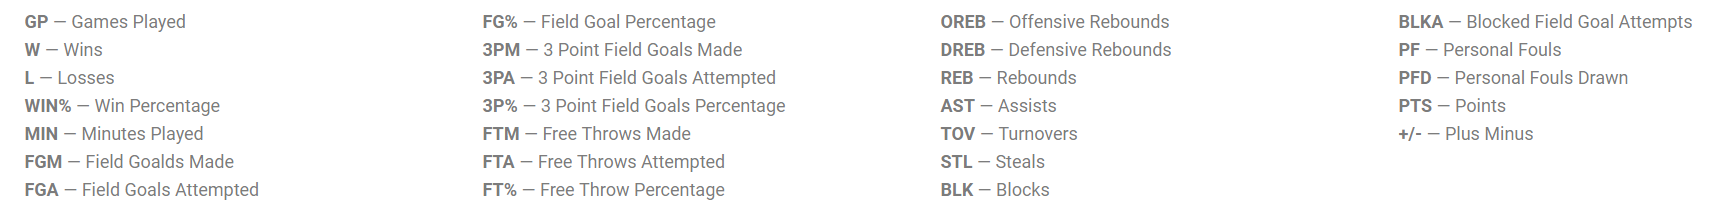

In [4]:
nba_dados.describe()

,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
count,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,69.600000,34.80000,34.800000,0.496167,48.353333,111.656667,40.813333,88.790000,45.973333,12.180000,34.056667,35.760000,17.856667,23.116667,77.246667,10.080000,34.700000,44.783333,24.353333,14.553333,7.656667,4.896667,4.906667,20.780000,20.766667,-0.130000
std,2.774266,11.67786,9.956457,0.157188,0.165536,3.920123,1.339772,2.011407,1.222189,1.464617,3.950616,1.431565,1.601870,1.781724,2.973879,0.840525,2.111218,2.178117,1.692118,1.065358,0.881098,0.736480,0.667436,1.302359,1.084160,4.947877
min,64.000000,15.00000,16.000000,0.231000,48.100000,102.900000,37.300000,84.300000,43.400000,9.600000,27.800000,33.300000,15.100000,19.200000,69.400000,8.100000,31.400000,41.700000,20.500000,12.600000,6.100000,3.200000,3.700000,18.300000,18.800000,-8.700000
25%,67.750000,23.25000,27.000000,0.342000,48.200000,109.550000,40.000000,88.025000,44.975000,11.000000,31.425000,34.800000,16.600000,22.075000,75.300000,9.725000,33.400000,42.925000,23.300000,13.875000,7.225000,4.500000,4.500000,19.625000,20.025000,-3.475000
50%,71.000000,33.50000,38.500000,0.462000,48.400000,112.050000,40.850000,88.800000,46.200000,12.050000,33.750000,35.700000,17.950000,23.300000,77.700000,10.200000,34.550000,44.700000,24.250000,14.700000,7.700000,4.900000,4.900000,20.900000,20.650000,-0.800000
75%,71.000000,43.75000,42.750000,0.618500,48.500000,114.075000,42.000000,90.525000,46.875000,13.250000,35.900000,36.800000,18.850000,24.400000,79.225000,10.600000,35.750000,45.925000,25.675000,15.200000,8.175000,5.450000,5.300000,21.775000,21.550000,3.100000
max,74.000000,56.00000,50.000000,0.778000,48.600000,118.800000,43.300000,91.700000,47.900000,15.700000,45.100000,38.100000,20.800000,26.200000,83.500000,12.000000,42.300000,51.800000,27.100000,16.500000,10.000000,6.700000,6.400000,23.100000,22.800000,10.400000


Vamos verificar as correalções das estatísticas dentro dos times, correlacionando o seu percentual de vitórias

### Análise das Correlações e Variáveis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



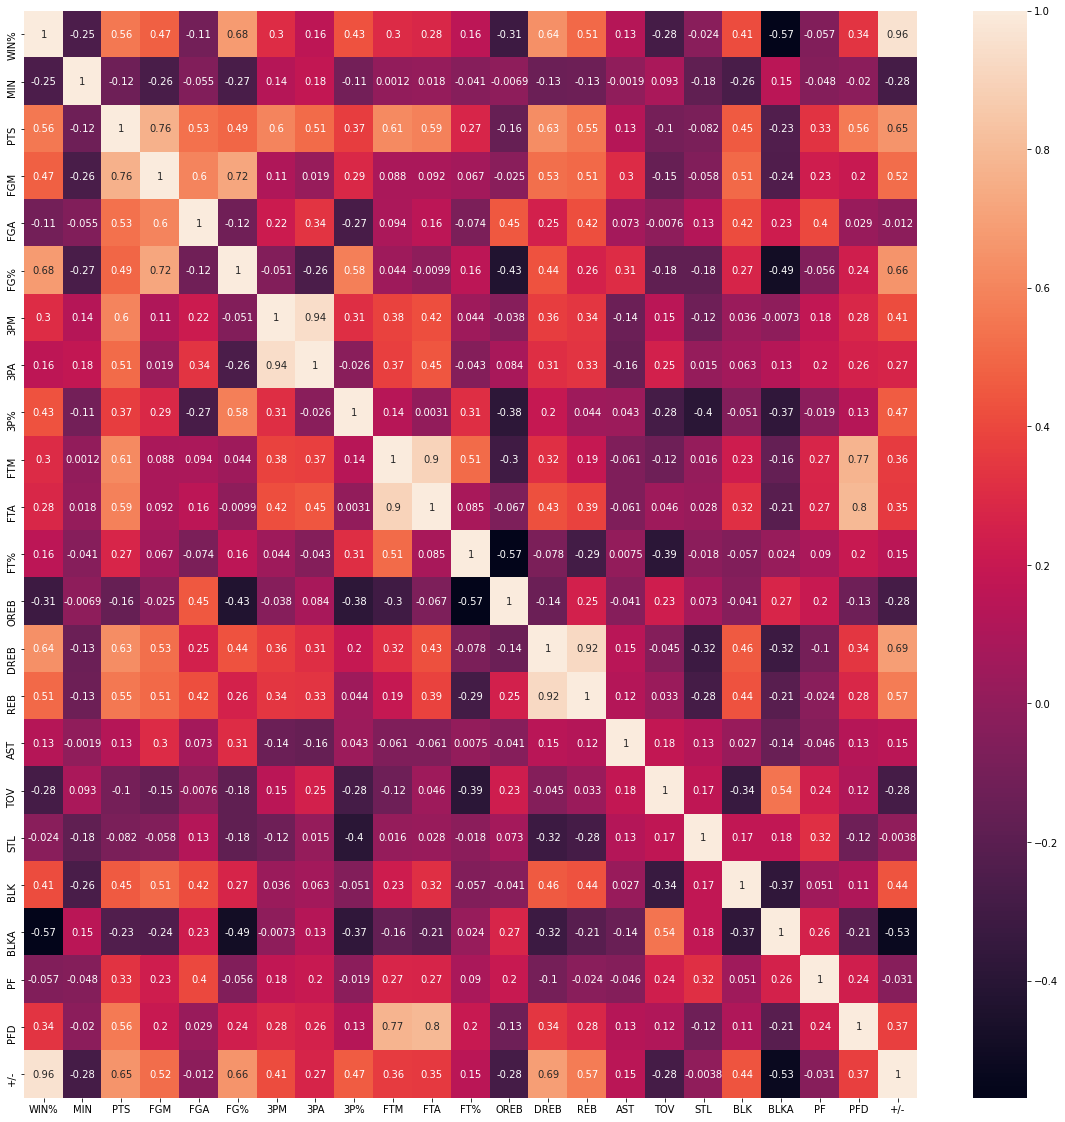

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

sns.heatmap(nba_dados.drop(columns=['GP','W','L']).corr(), annot=True)

Podemos notar que a estatística com a maior correlação ao % de vitórias é o **%FG** e **DREB**, % de Field Gol e Rebotes Defensivos na sequencia. 
Vamos fazer uma análise rápida olhando apenas o % de vitórias.
Vamos analisar as estatísticas **avançadas**

In [6]:
advanced = pd.read_excel('/content/drive/My Drive/Colab Notebooks/NBA_expec.xlsx')

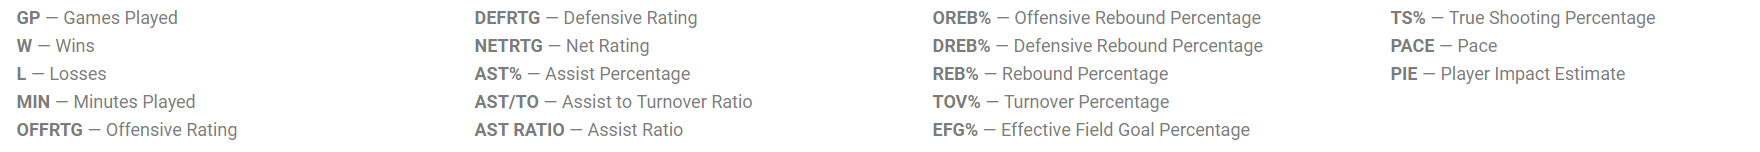

In [7]:
full = pd.merge(nba_dados[['TEAM','WIN%']], advanced, on='TEAM', how='inner')

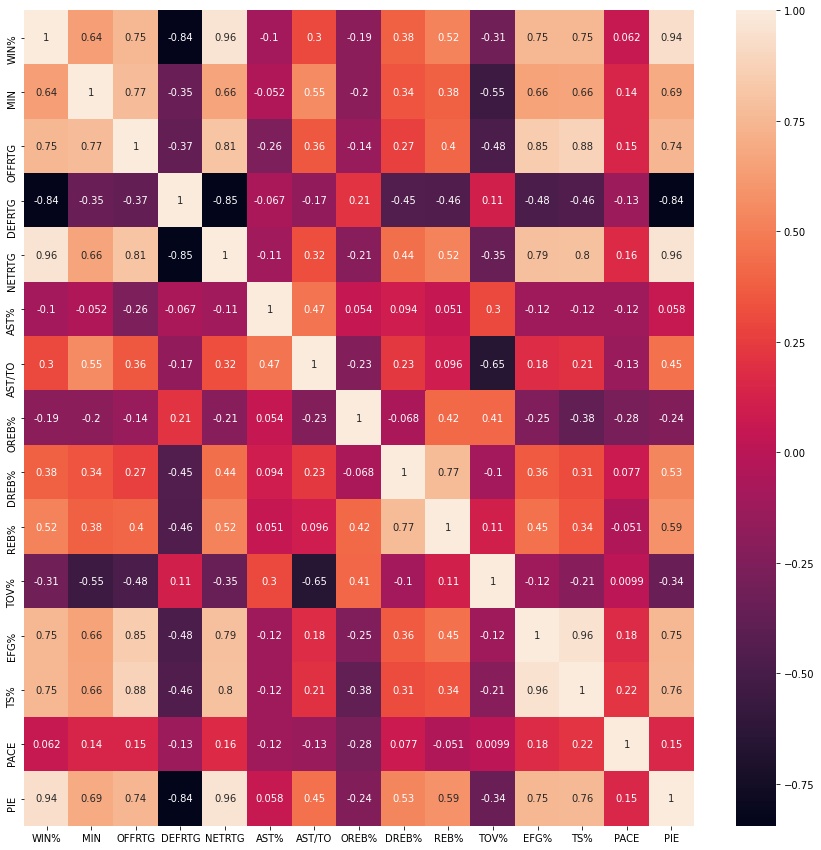

In [8]:
plt.figure(figsize=(15,15))

sns.heatmap(full.drop(columns=['GP','W','L']).corr(), annot=True)

In [9]:
cols = ['WIN%','PTS','FG%','FT%','3P%','OREB','DREB','BLKA']

Vamos olhar diretamente as correalações pré selecionadas pelo heatmap, olhando a contribuição individual, e vamos escolher algumas estatísticas para compor a nossa análise.

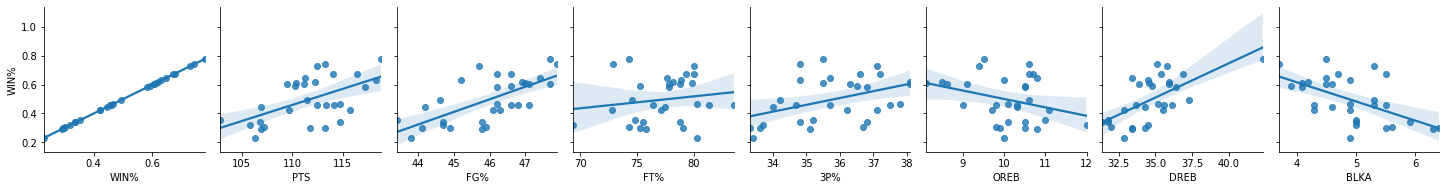

In [10]:
sns.pairplot(data=nba_dados.drop(columns=['GP','W','L']),
                  y_vars=['WIN%'],
                  x_vars=cols,
                  kind='reg')

In [11]:
cols_adv = ['NETRTG','EFG%','TS%']

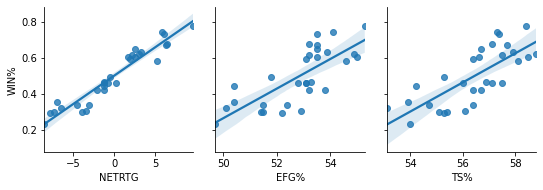

In [12]:
sns.pairplot(data=full.drop(columns=['GP','W','L']),
                  y_vars=['WIN%'],
                  x_vars=cols_adv,
                  kind='reg')

<Figure size 864x576 with 0 Axes>

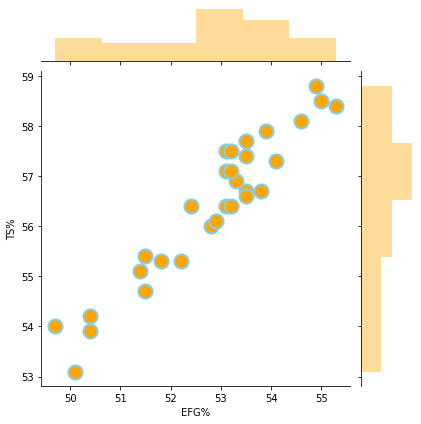

In [13]:
plt.figure(figsize=(12,8))
sns.jointplot(x="EFG%", y="TS%",
                s=200, color='orange', edgecolor="skyblue", linewidth=2,
                data=full, kind='scatter')

### Seleção de variáveis para estudo

Com as análises prévias vamos selecioar as variáveis de %FG e Rebotes defensivos. 
Vamos então analisar os jogadores que tem bons aproveitamentos nessas estatísticas e avaliar quais estão acima da média dentre todos os jogadores da liga.

In [14]:
jogadores = pd.read_excel('/content/drive/My Drive/Colab Notebooks/players.xlsx')

In [15]:
jogadores.head()

,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3
1,Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4
2,Damian Lillard,65,37.4,29.8,9.4,20.4,46.0,4.0,10.2,39.7,7.0,7.8,88.8,0.5,3.8,4.3,8.0,1.0,0.3,3.0,28.6
3,Trae Young,60,35.3,29.6,9.1,20.8,43.7,3.4,9.5,36.1,8.0,9.3,86.0,0.5,3.7,4.3,9.3,1.1,0.1,4.8,26.6
4,Giannis Antetokounmpo,63,30.4,29.5,10.9,19.7,55.3,1.4,4.7,30.4,6.3,10.0,63.3,2.2,11.4,13.6,5.6,1.0,1.0,3.7,34.6


Vamos plotar os jogadores nessas 2 variáveis e analisar os jogadores em quadrantes de desempenho.


In [16]:
jogadores.set_index("PLAYER", inplace=True)

Vamos fazer um corte pelos minutos jogados, para entender o impacto dos jogadores dentro dessas métricas de acompanhamento e também o seu tempo de impacto dentro de quadra.

In [17]:
jogadores['faixa_tempo'] = pd.cut(jogadores['MIN'], 5)

In [18]:
jogadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, James Harden to Matthew Dellavedova
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GP           262 non-null    int64   
 1   MIN          262 non-null    float64 
 2   PTS          262 non-null    float64 
 3   FGM          262 non-null    float64 
 4   FGA          262 non-null    float64 
 5   FG%          262 non-null    float64 
 6   3PM          262 non-null    float64 
 7   3PA          262 non-null    float64 
 8   3P%          262 non-null    float64 
 9   FTM          262 non-null    float64 
 10  FTA          262 non-null    float64 
 11  FT%          262 non-null    float64 
 12  OREB         262 non-null    float64 
 13  DREB         262 non-null    float64 
 14  REB          262 non-null    float64 
 15  AST          262 non-null    float64 
 16  STL          262 non-null    float64 
 17  BLK          262 non-null    float64 
 18  TOV     

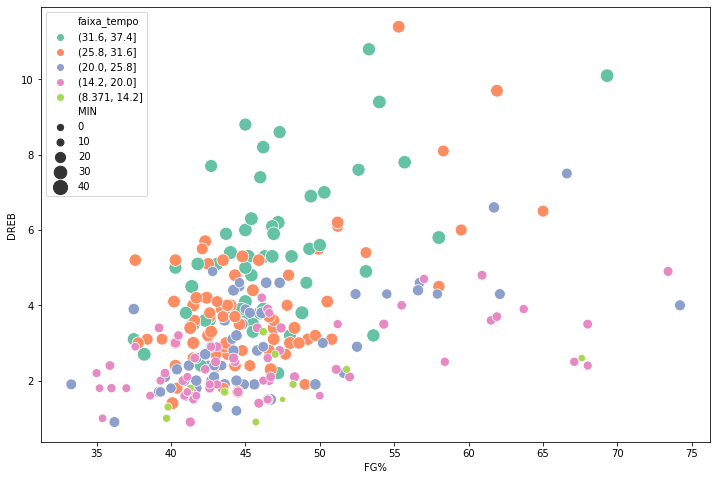

In [19]:
plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(dark=2, light=.8, as_cmap=True)
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="faixa_tempo", size="MIN",
                     palette="Set2", sizes=(40, 200),
                     data=jogadores)



Fazendo uma análise dos jogadores por tempo, podemos ver que temos jogadores suficientes que tem bons rebotes e boms percentuais de field goal, agora vamos ver como está a distribuição de tempo desses jogadores

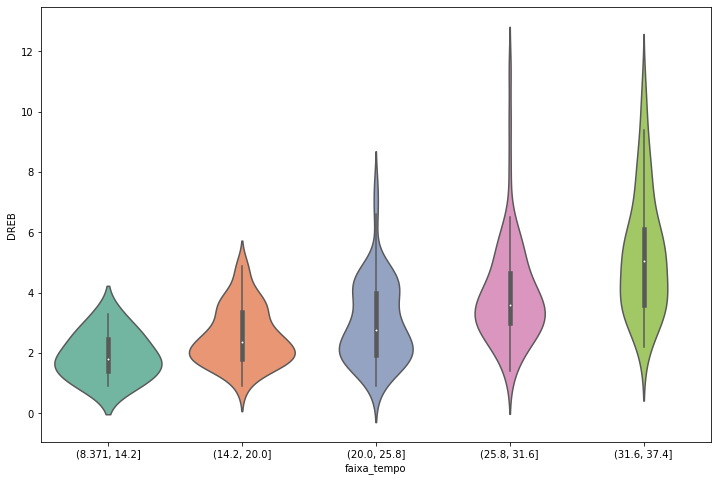

In [20]:
plt.figure(figsize=(12,8))
sns.violinplot(x="faixa_tempo", y="DREB",palette="Set2", data=jogadores)

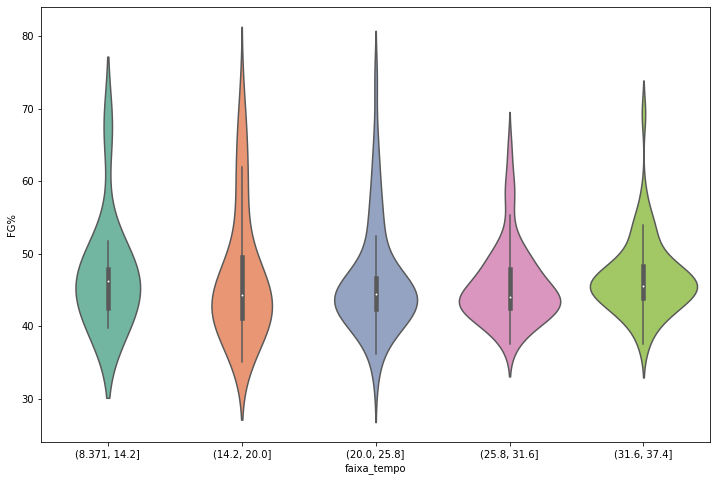

In [21]:
plt.figure(figsize=(12,8))
sns.violinplot(x="faixa_tempo", y="FG%",palette="Set2", data=jogadores)

Podemos notar que jogadores com bastante tempo de quadra, tem perfis de rebote bem distintos.

Porém, podemos notar também que as faixas de minutos jogados são correlacionadas com a quantidade de rebotes. Podemos desconsiderar essa variável nos quadrantes mais importantes, com jogadores com mais rebotes, porém ela pode ser determinante para a análise dos jogadores de rotação que ainda sim fazem um grande impacto nas variáveis de análise. 

Vamos tentar quebrar por posição de jogadores para entender se a distribuição vai mudar.

In [22]:
position = pd.read_excel('/content/drive/My Drive/Colab Notebooks/position.xlsx').rename(columns={"Player":"PLAYER"}).set_index("PLAYER")

In [23]:
position.head(2)

,Pos,Age,Tm
PLAYER,,,
Steven Adams,C,26,OKC
Bam Adebayo,PF,22,MIA


In [24]:
jogadores.head(2)

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo
PLAYER,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]"
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]"


In [25]:
player_position = pd.merge(jogadores,position,on='PLAYER',how='left')

In [26]:
player_position.head(3)

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo,Pos,Age,Tm
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]",SG,30.0,HOU
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]",SG,26.0,WAS
Damian Lillard,65,37.4,29.8,9.4,20.4,46.0,4.0,10.2,39.7,7.0,7.8,88.8,0.5,3.8,4.3,8.0,1.0,0.3,3.0,28.6,"(31.6, 37.4]",PG,29.0,POR


In [27]:
player_position['Pos'].fillna('nd', inplace=True)
player_position['Tm'].fillna('nd', inplace=True)

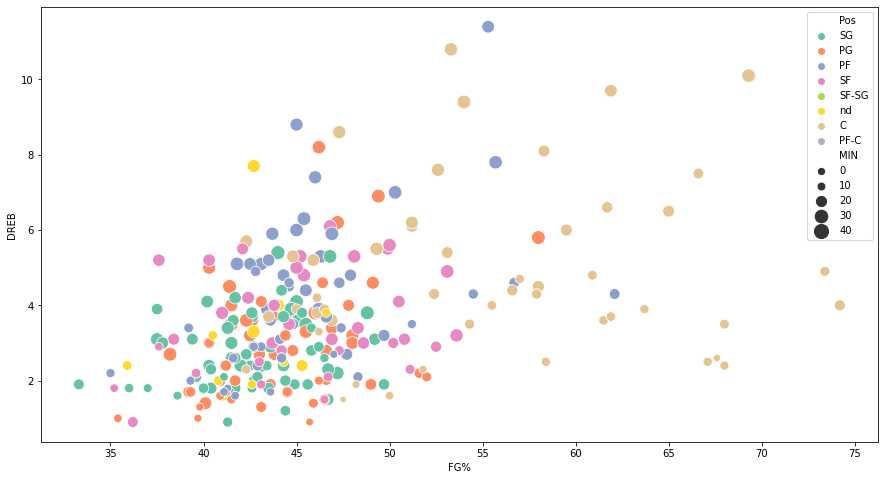

In [28]:
to_graph = player_position.reset_index().copy()
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="Pos", size="MIN",
                     palette="Set2", sizes=(40, 200),
                     data=to_graph)
#,range_x=[player_position["FG%"].min(),player_position["FG%"].max()],range_y=[player_position["DREB"].min(),player_position["DREB"].max()]

Fazendo a distribuição dessa maneira, podemos cortar um limiar de jogadores que podem ter mais impacto nessas variáveis.

Antes de continuarmos com a análise dos jogadores, nós temos que diferenciar as posições de jogadores, como a informação de rebote é uma informação importante, é de se esperar que os jogadores de posição **C, PF** tendem a ter valores de rebotes mais altos, então suas médias podem ser maiores do que os demais jogadores. 
Vamos criar umas categorias. 

In [29]:
player_position.head()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo,Pos,Age,Tm
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]",SG,30.0,HOU
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]",SG,26.0,WAS
Damian Lillard,65,37.4,29.8,9.4,20.4,46.0,4.0,10.2,39.7,7.0,7.8,88.8,0.5,3.8,4.3,8.0,1.0,0.3,3.0,28.6,"(31.6, 37.4]",PG,29.0,POR
Trae Young,60,35.3,29.6,9.1,20.8,43.7,3.4,9.5,36.1,8.0,9.3,86.0,0.5,3.7,4.3,9.3,1.1,0.1,4.8,26.6,"(31.6, 37.4]",PG,21.0,ATL
Giannis Antetokounmpo,63,30.4,29.5,10.9,19.7,55.3,1.4,4.7,30.4,6.3,10.0,63.3,2.2,11.4,13.6,5.6,1.0,1.0,3.7,34.6,"(25.8, 31.6]",PF,25.0,MIL


In [30]:
player_position.Pos.value_counts()

SG       75
PG       58
PF       56
C        56
SF       50
nd       11
SF-SG     2
PF-C      1
Name: Pos, dtype: int64

Construindo a separação por jogadores que atuam dentro e fora do garrafão.

In [31]:
corte_pos = pd.DataFrame({"Pos":["SG","PG","PF","C","SF","nd","SF-SG","PF-C"],"Atua":["fora","fora","dentro","dentro","fora","fora","fora","dentro"]})

In [32]:
player_full = player_position.reset_index().merge(corte_pos, on="Pos", how="inner").set_index("PLAYER")


In [33]:
player_full.head()

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo,Pos,Age,Tm,Atua
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,66,36.7,34.3,9.8,22.4,44.0,4.4,12.4,35.1,10.2,11.8,86.4,1.0,5.4,6.5,7.5,1.8,0.9,4.5,32.3,"(31.6, 37.4]",SG,30.0,HOU,fora
Bradley Beal,57,36.0,30.5,10.4,22.9,45.5,3.0,8.4,35.3,6.8,8.0,84.2,0.9,3.3,4.2,6.1,1.2,0.4,3.4,25.4,"(31.6, 37.4]",SG,26.0,WAS,fora
Devin Booker,69,35.9,26.6,8.9,18.3,48.8,2.0,5.7,35.9,6.7,7.3,91.9,0.4,3.8,4.2,6.5,0.7,0.3,3.8,24.5,"(31.6, 37.4]",SG,23.0,PHO,fora
Zach LaVine,60,34.8,25.5,9.0,20.0,45.0,3.1,8.1,38.0,4.5,5.6,80.2,0.7,4.1,4.8,4.2,1.5,0.5,3.4,21.0,"(31.6, 37.4]",SG,24.0,CHI,fora
Donovan Mitchell,68,34.6,24.2,8.8,19.7,44.8,2.5,6.9,36.2,4.1,4.7,86.3,0.8,3.6,4.4,4.3,1.0,0.2,2.7,19.9,"(31.6, 37.4]",SG,23.0,UTA,fora


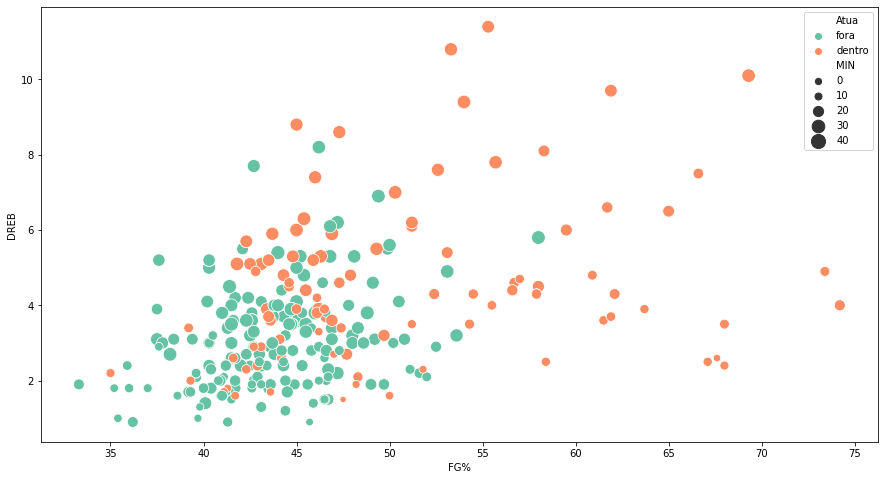

In [34]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="Atua", size="MIN",
                     palette="Set2", sizes=(40, 200),
                     data=player_full)
#,range_x=[player_position["FG%"].min(),player_position["FG%"].max()],range_y=[player_position["DREB"].min(),player_position["DREB"].max()]

## Jogadores com atuação Fora do Garrafão

Podemos notar que os jogadores que atuam dentro do garrafão, tem maiores estatísticas que contribuem com o par considerado **contribuição vencedora**, porém isso faz sentido com seu perfil de jogo próximo a sexta. 

Vamos fazer uma extratificação apenas dos clientes que atuam fora do garrafão, e analisar a sua contribuição para o jogo, comparando com a quantidade de minutos jogados por cada um.

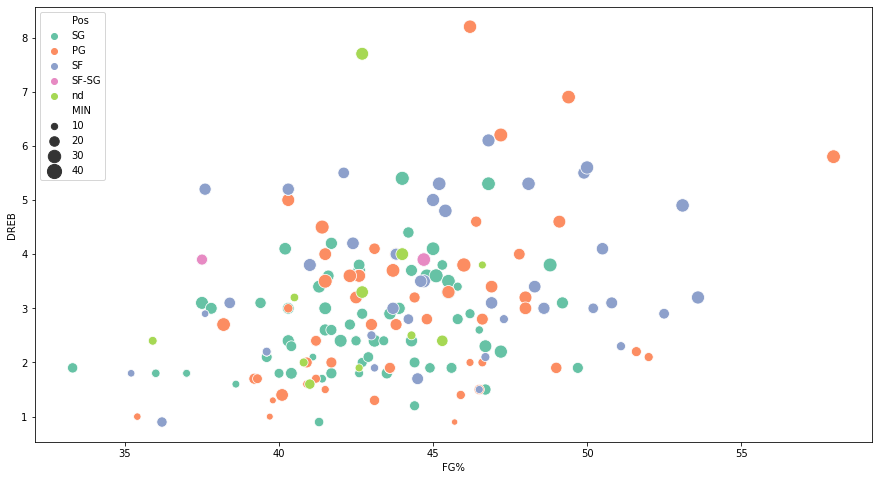

In [35]:
to_graph = player_full[player_full['Atua'] == 'fora'].reset_index().copy()

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="Pos", size="MIN",
                     palette="Set2", sizes=(40, 200),
                     data=to_graph)

Agora vamos analisar as métricas dessas 2 variáveis para identificar o que consideramos o corte para jogadores que realmente impactam essa métrica, e jogadores que impactam menos essa métrica. Com isso podemos construir um limiar para jogadores que mais contribuem vs os que menos contribuem.

In [36]:
player_full[player_full['Atua'] == 'fora'][["FG%","DREB"]].describe()

,FG%,DREB
count,196.000000,196.000000
mean,43.557653,3.027551
std,3.964405,1.282608
min,33.300000,0.900000
25%,41.175000,2.000000
50%,43.550000,2.900000
75%,45.925000,3.800000
max,58.000000,8.200000


Vamos olhar mais profundamente para os jogadores que estão no quadrante acima da média em ambas as categorias:


1.   FG% >= 43.7%
2.   DREB >= 3.2



<Figure size 1080x576 with 0 Axes>

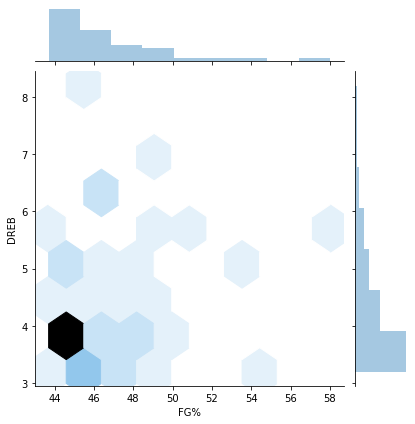

In [37]:
plt.figure(figsize=(15,8))
sns.jointplot(
    x="FG%",
    y="DREB",
    data=player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2)],
    kind='hex'
)

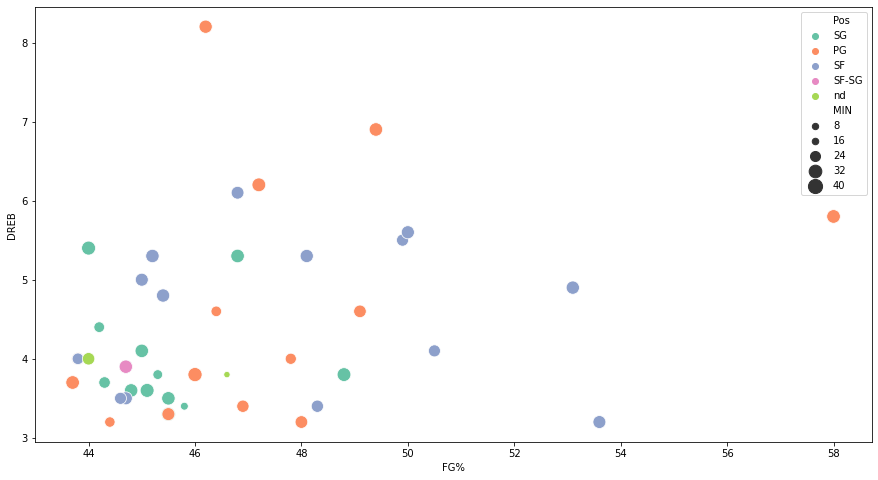

In [38]:
to_graph =player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2)].reset_index().copy()

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="Pos", size="MIN", sizes=(40, 200),
                     palette="Set2",
                     data=to_graph)

Podemos dizer que estes seriam os jogadores com **maior impacto** no WIN% dos times da NBA, considerando o par de características correlacionadas. 
Claro que esta é uma análise superficial, considerando apenas 2 variáveis simples, e sabemos que o impacto do jogo é muito mais complexo que apenas o **FG%** e **Defensive Rebound**.

Encontramos alguns nomes conhecidos, como **Luka Doncic**, **Kawhi**, **LeBron** e **Westbrook**

Vamos olhar algumas quantidade e determinar quais jogadores tem mais impacto. 

In [39]:
extrato = player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2)]

In [40]:
extrato.Pos.value_counts()

SF       17
PG       14
SG       13
nd        2
SF-SG     1
Name: Pos, dtype: int64

Temos muitos mais **SF** e **PG** que podem ser impactantes no **WIN%** do que as demais posições.

Vamos analisar os jogadores selecionados, e quais times eles representam.

In [41]:
extrato.index.unique()

Index(['James Harden', 'Bradley Beal', 'Devin Booker', 'Zach LaVine',
       'Donovan Mitchell', 'CJ McCollum', 'Andrew Wiggins', 'Jrue Holiday',
       'Shai Gilgeous-Alexander', 'Troy Brown Jr.', 'Donte DiVincenzo',
       'Bruce Brown', 'Pat Connaughton', 'Damian Lillard', 'Trae Young',
       'Luka Doncic', 'Russell Westbrook', 'LeBron James', 'De'Aaron Fox',
       'Dennis Schroder', 'Jamal Murray', 'Chris Paul', 'Malcolm Brogdon',
       'Ben Simmons', 'Eric Bledsoe', 'Dejounte Murray', 'Kris Dunn',
       'Kawhi Leonard', 'DeMar DeRozan', 'Khris Middleton', 'Jaylen Brown',
       'Bojan Bogdanovic', 'Jimmy Butler', 'T.J. Warren', 'Kelly Oubre Jr.',
       'Gordon Hayward', 'Will Barton', 'Joe Harris', 'OG Anunoby',
       'Joe Ingles', 'Trevor Ariza', 'Marcus Morris Sr.', 'Ersan Ilyasova'],
      dtype='object', name='PLAYER')

In [42]:
extrato.Tm.value_counts().head()

MIL    4
POR    3
OKC    3
UTA    3
SAC    2
Name: Tm, dtype: int64

Ja podemos perceber que o **Milwaukee Bucks** é o time com a maior quantidade de jogadores com o perfil selecionado como **perfil de impacto**, o que é condizente com a posição atual do time como **Lider da NBA** (análise feita em 13/08/2020)

In [43]:
player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2) & (player_full["Tm"] == "MIL")]

,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,faixa_tempo,Pos,Age,Tm,Atua
PLAYER,,,,,,,,,,,,,,,,,,,,,,,,,
Donte DiVincenzo,65,23.1,9.1,3.5,7.6,45.3,1.2,3.7,33.1,1.0,1.3,75.0,1.0,3.8,4.8,2.3,1.3,0.3,1.3,12.0,"(20.0, 25.8]",SG,23.0,MIL,fora
Pat Connaughton,66,18.6,5.4,2.1,4.5,45.8,0.8,2.5,33.5,0.5,0.6,77.5,0.9,3.4,4.3,1.6,0.4,0.5,0.8,8.8,"(14.2, 20.0]",SG,27.0,MIL,fora
Eric Bledsoe,60,27.1,15.1,5.6,11.6,47.8,1.2,3.6,34.7,2.8,3.5,79.2,0.7,4.0,4.7,5.4,0.9,0.4,2.5,17.3,"(25.8, 31.6]",PG,30.0,MIL,fora
Khris Middleton,61,30.0,21.0,7.6,15.3,49.9,2.4,5.8,41.6,3.3,3.6,91.9,0.7,5.5,6.2,4.3,0.9,0.1,2.2,22.3,"(25.8, 31.6]",SF,28.0,MIL,fora


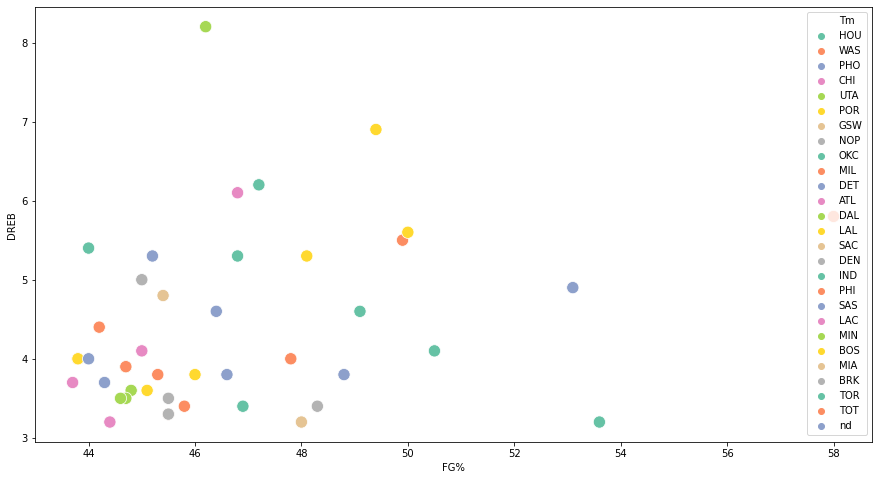

In [53]:
to_graph =player_full[(player_full['Atua'] == 'fora') & (player_full["FG%"] >= 43.7) & (player_full["DREB"] >= 3.2)].reset_index().copy()

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="Tm",
                     palette="Set2", s=150,
                     data=to_graph)


Além doo **milwaukee bucks**, vemos que existe um jogador distanciando dos outros: **Ben Simmons**  com um **%FG** acima de 58% e próximo dos 6 rebotes defensivos por partida disponta como o melhor jogador nos critérios da nossa avaliação.


## Análise dos Jogadores com atuação Próxima ao Garrafão

Vamos repetir a análise feita com os jogadores que atuam fora do garrafão, para jogadores que atuam dentro do garrafão, criando um limiar e entendendo os perfis

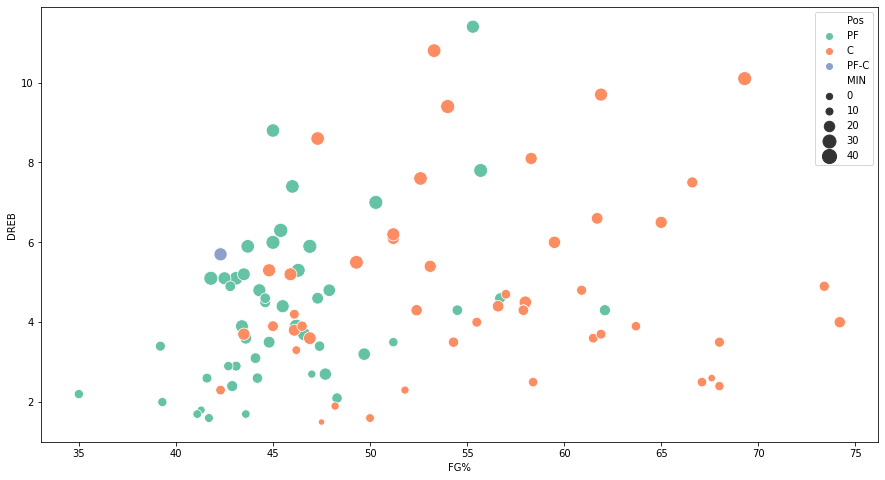

In [45]:
to_graph = player_full[player_full['Atua'] == 'dentro'].reset_index().copy()

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="Pos", size="MIN",
                     palette="Set2", sizes=(40, 200),
                     data=to_graph)

In [46]:
player_full[player_full['Atua'] == 'dentro'][["FG%","DREB"]].describe()

,FG%,DREB
count,113.000000,113.000000
mean,50.018584,4.562832
std,8.522036,2.206289
min,35.000000,1.500000
25%,44.100000,3.100000
50%,47.000000,4.200000
75%,55.500000,5.400000
max,74.200000,11.400000


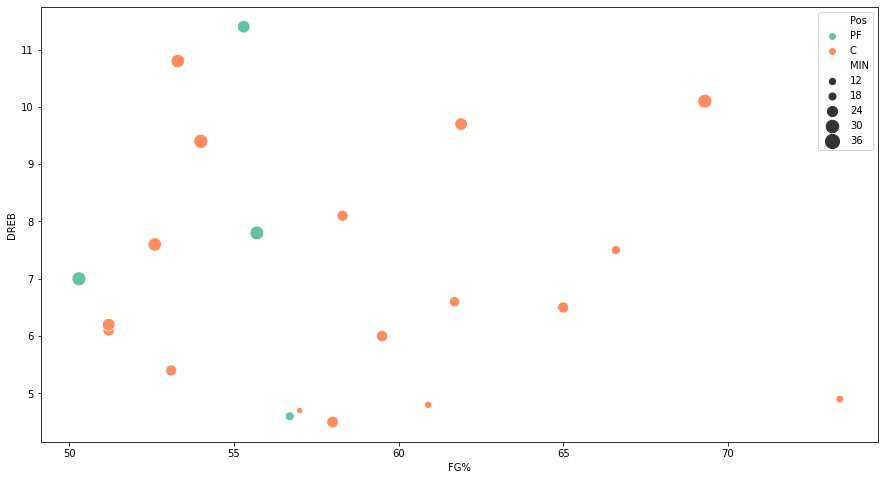

In [47]:
to_graph =player_full[(player_full['Atua'] == 'dentro') & (player_full["FG%"] >= 50) & (player_full["DREB"] >= 4.5)].reset_index().copy()

plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="FG%", y="DREB",
                     hue="Pos", size="MIN",
                     palette="Set2", sizes=(40, 200),
                     data=to_graph)


Como era de se esperar, temos menos jogadores com esse perfil, porém vamos verificar os times que tem mais jogadores no melhor quadrante dessas posições:

In [48]:
extrato_dentro = player_full[(player_full['Atua'] == 'dentro') & (player_full["FG%"] >= 50) & (player_full["DREB"] >= 4.5)].reset_index().copy()

In [49]:
extrato_dentro.Tm.value_counts().head()

CLE    3
BRK    2
LAL    2
LAC    2
DET    2
Name: Tm, dtype: int64